### Black Friday Dataset - Data Exploration Notebook Example

The purpose of this notebook is to perform a basic/introductory data exploration exercise over the Black Friday dataset obtained from https://www.kaggle.com/mehdidag/black-friday. 

This exercise will be performed by using the following libraries:
- pandas: for reading the csv source data file and data processing steps



In [1]:
#Python libraries import section
import pandas as pd
%matplotlib inline

In [2]:
#In this step I read the data from the BlackFriday.csv file and load it to a pandas dataframe object called: data
csv_path = "./data/BlackFriday.csv"
data = pd.read_csv(csv_path)

Now that the data has been loaded into the dataframe object I will begin with the data exploration exercise by using some of the most common functions available for dataframes:

**- head():**    
The displayed results provide a good starting point to understand the content (variables and data) available in the dataset, as well to identify if we have any columns with null/NaN values. 

**- info()**     
This shows the structure/columns of the dataset and the corresponding data types.

**- describe():** 
Provides a basic statistical summary of the numeric variables in the dataset.

In [3]:
#head() by default returns the first 5 rows of data.
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#info() provides a consice summary of the dataframe. 
#It shows all columns, total count of non-null values and the data type for each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
#Provides an statistical overview for each numeric column in the dataframe.
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In the next steps of the analysis, I will perform some basic operations over the Purchase column. For this, I will create variable purchase with the values of the Purchase column from the dataframe.

In [6]:
#Creates a purchase variable with all the data from the Purchase column in the dataset.
purchase = data['Purchase']

In [7]:
    #Returns the minimum value found in the purchase variable.
    purchase.min()

185

In [8]:
#Returns the maximum value found in the purchase variable
purchase.max()

23961

In [9]:
#Returns the mean/average of the values in the purchase variable
purchase.mean()

9333.859852635065

In [10]:
#Returns all values/rows where the purchase value higher than 5000
purchase[purchase>5000]

0          8370
1         15200
4          7969
5         15227
6         19215
          ...  
537572    11664
537573    19196
537574     8043
537575     7172
537576     6875
Name: Purchase, Length: 448145, dtype: int64

In [11]:
#Returns all purchase values/rows where the Gender column in the dataframe is equals to M
purchase[data['Gender'] == 'M']

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
537572    11664
537573    19196
537574     8043
537575     7172
537576     6875
Name: Purchase, Length: 405380, dtype: int64

In the next code section I will perform the following actions:
- I will create a new dataframe called: seg1 that contains all values/rows from the purchase variable that meets the following criteria: 1) rows where the Gender column in the dataframe is equals to M AND the values of the purchase variable are higher than 5000
- Once I have the results of the previous query, I will print a histogram to show the distribution of the data.

<AxesSubplot:>

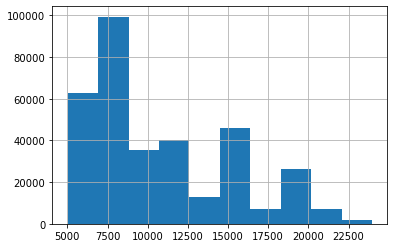

In [12]:
#Step 1 - filters down the data based on the mentioned conditions
seg1 = purchase[(data['Gender'] == 'M') & (purchase > 5000)]
#Step 2 - prints out the histogram over the results obtained from Step #1
seg1.hist()

In [13]:
#Performs a query over the dataframe
#Groups the data by gender and adds up the values of the Purchase column
data.groupby('Gender')['Purchase'].sum()

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

_____________________________________
                                                                                           Created by: Andrés Montero Méndez
                                                                                                             Date: 5/23/2021